In [7]:
import pandas as pd
import numpy as np
from consts import PATH, RFM_PATH

In [8]:
data = pd.read_parquet(PATH)

In [20]:
data['lagged_rep_date'] = data.groupby('partner', as_index=True)['rep_date'].shift(-1)
data['next_buy'] = data['lagged_rep_date'] - data['rep_date']
data['next_buy'] = data['next_buy'].apply(lambda x: x.days)

In [23]:
analysis = pd.concat([
    data.groupby('partner', as_index=True).agg(D=("next_buy", np.var)),
    data.groupby('partner', as_index=True).agg(mean=("next_buy", np.mean)),
], axis=1)

In [24]:
analysis

,D,mean
partner,,
0,146.894697,18.802920
1,79.272138,9.755639
2,4887.713033,44.298246
3,177503.066667,382.333333
4,3607.798768,14.314607
...,...,...
1695379,99946.333333,383.666667
1695380,47432.000000,227.000000
1695381,66175.108225,90.818182


<Axes: xlabel='Days', ylabel='Density'>

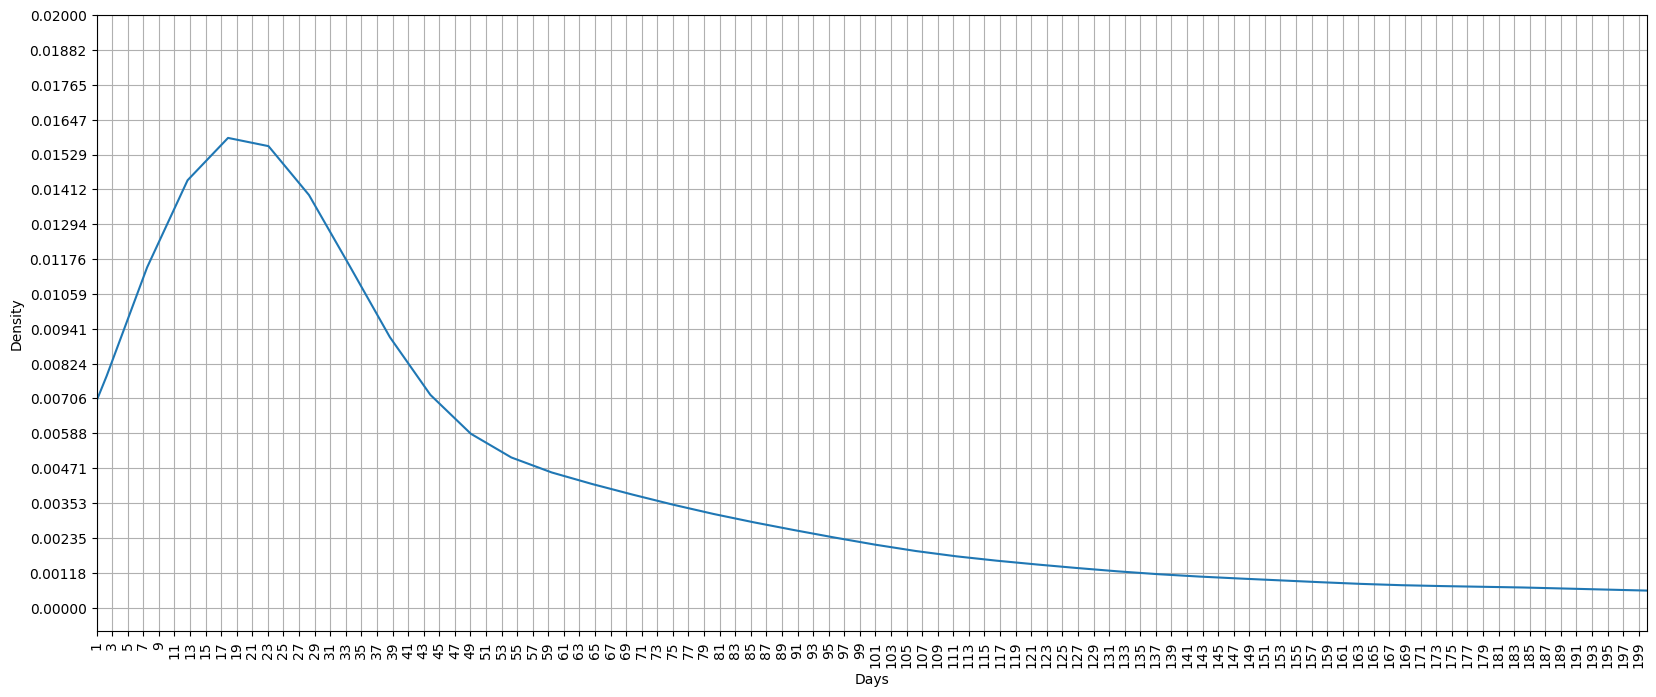

In [47]:
plot = analysis['mean'].plot(kind='kde', xlim=(1, 200), xticks=range(1, 200, 2), yticks=np.linspace(0, 0.02, 18), grid=True, rot=90, figsize=(20, 8))
plot.set_xlabel('Days')
plot

График среднего промежутка между покупками у клиентов

In [29]:
analysis['mean'].describe()

count    1.488443e+06
mean     8.571292e+01
std      1.694160e+02
min      1.000000e+00
25%      1.751786e+01
50%      3.196296e+01
75%      8.136000e+01
max      2.596000e+03
Name: mean, dtype: float64

In [30]:
analysis['D'].describe()

count    1.345749e+06
mean     2.602535e+04
std      1.253247e+05
min      0.000000e+00
25%      1.158513e+02
50%      6.401811e+02
75%      5.402476e+03
max      3.377400e+06
Name: D, dtype: float64